# 决策树
是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果，本质是一颗由多个判断节点组成的树。

## 熵
物理学上，熵(Entropy)是“混乱”程度的量度。

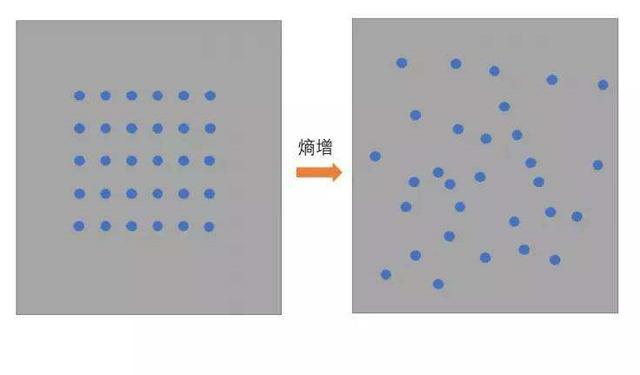

系统越有序，熵值越低；系统越混乱或者分散，熵值越高。

- 信息理论：
    - 1、从信息的完整性上进行的描述:
        - 当系统的有序状态一致时，数据越集中的地方熵值越小，数据越分散的地方熵值越大。
    - 2、从信息的有序性上进行的描述:
        - 当数据量一致时，系统越有序，熵值越低；系统越混乱或者分散，熵值越高。

### 信息熵(information entropy)
是度量样本集合纯度最常用的一种指标。
假定当前样本集合D中第k类样本所占的比例为$p_{k}(\mathrm{k}=1,2,\ldots,|y|)$,$p_k=\frac{C^k}D$, D为样本的所有数量,$C^k$为第k类样本的数量。

则D的信息熵定义为(log是以2为底，lg是以10为底):

$$Ent(D)=-\sum_{k=1}^n\frac{C^k}Dlog\frac{C^k}D=-\sum_{k=1}^np_klog_2p_k=-p_1log_2p_1-p_2log_2p_2-\ldots-p_nlog_2p_n$$

其中：$Ent(D)$的值越小，则$D$的纯度越高.

#### 案例
    假设我们没有看世界杯的比赛，但是想知道哪支球队会是冠军，我们只能猜测某支球队是或不是冠军，然后观众用对或不对来回答，我们想要猜测次数尽可能少，你会用什么方法？

答案：
二分法：
假如有 16 支球队，分别编号，先问是否在 1-8 之间，如果是就继续问是否在 1-4 之间，以此类推，直到最后判断出冠军球队是哪支。如果球队数量是 16，我们需要问 4 次来得到最后的答案。那么世界冠军这条消息的信息熵就是 4。

那么信息熵等于4，是如何进行计算的呢？

$$Ent(D) = -(p1 * logp1 + p2 * logp2 + ... + p16 * logp16)$$

其中 p1, ..., p16 分别是这 16 支球队夺冠的概率。

当每支球队夺冠概率相等都是 1/16 的时：$Ent(D) = -(16 * 1/16 * log1/16) = 4$

每个事件概率相同时，熵最大，这件事越不确定。

##### 随堂练习：

篮球比赛里，有4个球队 {A,B,C,D} ，获胜概率分别为{1/2, 1/4, 1/8, 1/8}

求Ent(D)

答案：

$$\begin{aligned}
Ent(D)& =-[\frac{1}{2}log_{2}(\frac{1}{2})+\frac{1}{4}log_{2}(\frac{1}{4})+\frac{1}{8}log_{2}(\frac{1}{8})+\frac{1}{8}log_{2}(\frac{1}{8})]  \\
&=\frac{1}{2}log_{2}2+\frac{1}{4}log_{2}4+\frac{1}{8}log_{2}8+\frac{1}{8}log_{2}8 \\
&=(\frac{1}{2}+\frac{1}{2}+\frac{3}{8}+\frac{3}{8})log_{2}2 \\
&=\frac{7}{4}
\end{aligned}$$

## 常见决策树的启发函数比较
### 信息熵
$$Ent(D)=-\sum_{k=1}^np_klog_2p_k$$

### 信息增益--ID3决策树
$$Gain(D,a)=Ent(D)-Ent(D|a)=Ent(D)-\sum_{v=1}^{V}\frac{D^v}DEnt(D^v)$$

### 信息增益率--C4.5决策树
$$Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$

### 基尼值
$$Gini(D)=\sum_{k=1}^{|y|}\sum_{k\neq k}p_kp_{k^{\prime}}=1-\sum_{k=1}^{|y|}p_k^2$$

### 基尼指数--CART 决策树
$$Gini\_index(D,a)=\sum_{v=1}^{V}\frac{D^{v}}DGini(D^{v})$$

| 名称  | 提出时间 | 分支方式  | 备注                                                    |
| ----- | -------- | --------- | ------------------------------------------------------- |
| ID3   | 1975     | 信息增益  | ID3只能对离散属性的数据集构成决策树                        |
| C4.5  | 1993     | 信息增益率 | 优化后解决了ID3分支过程中总喜欢偏向选择值较多的属性      |
| CART  | 1984     | Gini系数  | 可以进行分类和回归，可以处理离散属性，也可以处理连续属性 |